# Module 3.1 Numerical Integration (1 of 2)

Throughout physics we encounter the need to evaluate integrals. 
For example, work is the line integral of a force along a path, Gauss' law relates the surface
integral of the electric field to the enclosed charge, the action is the integral of the Lagrangian,
_etc_. `

## Learning objectives:
* Be able to numerically compute an integral using left/right/midpoint methods.
* Make an assessment of the accuracy of the integral and plot the error as a function of the number of intervals

# Pre-class

Remind yourself of Reimann sums, either through your calculus textbook and/or this [video](https://youtu.be/rfG8ce4nNh0)

Download the PDF of [TAK](https://catalog.lib.ncsu.edu/record/NCSU4441969) and read Sec 3.3, up to at least page 53. You will probably find it helpful to read along using a paper/pencil, and/or be able to draw on your PDF.


# In-class


## Preliminary: computing sums

As part of this section, we'll need to know how to compute some sums.  Recall that there are a few ways of doing that.  Recall that we computed the sum of an array of numbers `xarray` using:

    # ################################################
    # For loop type 1
    
    # Prepare a variable to store the sum
    mysum=0
    
    # Loop over indices
    for i in range(len(xarray)):
        mysum = mysum + xarray[i]
        
    # ################################################
    # For loop type 2 
    # Prepare a variable to store the sum
    mysum=0
    
    # Loop over values
    for x in xarray:
        mysum = mysum + x
    
    # ################################################
    # No loops -- use the built-in `sum` function
    mysum = np.sum( xarray )
    
If you're ever confused about what a numpy function does, Google is your friend:
https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.sum.html. Although the documentation may be somewhat overwhelming at times, there is usually a simple example or two at the bottom of the page.

**Exercise**: Compute the sum of the numbers ``1.0`` through ``10.0`` (inclusive) separated by ``1`` using all three the methods above.  You'll need to generate the `xarray`.  Print it before you sum, just to make sure you have it right.

In [1]:
# Method 1
import numpy as np
xarray = np.array([1,2,3,4,5,6,7,8,9,10])
print(xarray)

sum=0

# Now copy the for loop from above
for i in range(len(xarray)):
    sum+=xarray[i]
print(sum)

[ 1  2  3  4  5  6  7  8  9 10]
55


In [2]:
# Method 2
sum=0
for x in xarray:
    sum+=x
print(sum)

55


In [3]:
# Method 3
sum=0
%time sum=np.sum(xarray)
print(sum)

CPU times: user 39 μs, sys: 9 μs, total: 48 μs
Wall time: 51.5 μs
55


## Rectangle Methods


The integral of a function is the "area under the curve". (This is the case for most functions we encounter in 
physics. Some exotic functions require a more sophisticated definition of the integral.) The area under the 
curve $f(x)$ from $x=a$ to $x=b$ can be approximated as the sum of the areas of the rectangles shown in the figure:

![Integration rectangles](https://upload.wikimedia.org/wikipedia/commons/e/ea/Integration_rectangle.png)

The rectangles are formed by dividing the interval $[a,b]$ into $N$ subintervals, from $[x_0,x_1]$, to 
$[x_{N-1},x_N]$. (Note that $x_0 = a$ and $x_N = b$.) The height of each rectangle is the value of the function 
at some point $\bar x_i$ within the subinterval
$[x_{i-1},x_i]$. The area of the $i$th rectangle is the product of the height $f(t_i)$ and the width $x_{i} - x_{i-1}$. 
Then the integral 

$$
I = \int_a^b f(x)\, dx
$$

is approximated by the sum of the areas of the rectangles:

$$
I \approx \sum_{i=0}^{N-1} f(\bar x_i)\,(x_i - x_{i-1})
$$

This approximation is called the Riemann sum. The exact value for $I$ is obtained by taking the limit $N\to \infty$.

In practice we must choose where to place the $x_i$'s and  $\bar x_i$'s before using the Riemann sum to 
approximate the integral $I$. Different choices lead to different numerical integration methods.
The simplest choice for the $x_i$'s is to make them equally spaced between the endpoints. That is, 
let $h = (b-a)/N$ denote the width of each subinterval, with

$$
x_i = a + ih
$$

for $i = 0,\ldots N-1$. There are three obvious choices for the $\bar x_i$'s:

1) With $\bar x_i = x_{i} = a + ih $, the height of each rectangle 
is the value of the function at the left side of the subinterval. This yields the _left endpoint rule_ approximation to $I$:

$$
I_L =  \sum_{i=0}^{N-1} f(a + ih) \, h
$$

2) With $\bar x_i = x_{i+1} = a + (i+1)h$, the height of each rectangle is the value of the function at the right side of the subinterval. This 
is the _right endpoint rule_

$$
I_R =  \sum_{i=0}^{N-1} f(a + (i+1)h) \, h
$$

3) With $\bar x_i = (x_i + x_{i+1})/2 = a + ih +h/2$, the height of each rectangle is the value of the 
function at the midpoint of the subinterval. This yields 

$$
I_M =  \sum_{i=0}^{N-1} f(a + (i+1/2)h) \, h
$$

which is called the "midpoint rule". 

Exercise
----------
Write a code some integrate the function $f(x) = \sin x$ between $a=0$ and $b=\pi/2$ using both 
the left and right endpoint rules. Structure your code so that it's easy to change $f(x)$, $a$, $b$, and the 
number of subintervals $N$. I suggest that you make a function of the form:

    def leftpoint(f, a, b, N):

where you may pass in the function `f` (defined elsewhere), and the variables `a`, `b` and `N`.

Compare your results of left/right endpoint to each other, and to the correct value.
Your results should become more accurate as you increase the number of subintervals $N$. 

In [4]:
import numpy as np

# Hint: for development/debugging,
# you may want to pick a set of $x_i$ that you know.  Print them to the screen to ensure
# you know that x-axis is correct. For example, a=1, b=2, N = 10.


def leftpoint(f,a,b,N):
    h = (b-a)/N #calculate width of box
    x = 0 #set starting left point as 0
    mysum = 0 #start sum as 0
    while x < b:
        mysum += f(x)*h #add area
        x += h #move left point

    return mysum   # Note that we need this to tell the code outside of the function about the result

def rightpoint(f,a,b,N):
    h = (b-a)/N #calculate width of box
    x = h #set starting right point as h
    mysum = 0 #start sum as 0
    while x <= b:
        mysum+=f(x)*h #add area
        x+=h #move right point

    return mysum   # Note that we need this to tell the code outside of the function about the result


f,a,b,N = np.sin, 0, np.pi/2, 25 #define variables

result_L=leftpoint(f,a,b,N) #Left endpoint Riemann sum

result_R=rightpoint(np.sin,0,np.pi/2,N) #Right endpoint Riemann sum
difference=abs(result_R-result_L)
print("The result of the left endpoint Riemannsum with ",N," intervals is",result_L)
print("The result of the right endpoint Riemannsum with ",N," intervals is",result_R)
print("These values differ by: ", difference)

The result of the left endpoint Riemannsum with  25  intervals is 0.9682550650022329
The result of the right endpoint Riemannsum with  25  intervals is 0.9682550650022329
These values differ by:  0.0


The correct value for this integral is 1. Therefore this method is very close to getting the correct answer. At N values above 25 the difference between the right and left endpoint calculation is negligable. 

You may notice that the answer is not exactly close to the real answer.  Let's investigate how poorly we're doing.  We can do this here by computing the integral for a variable number of intervals ($N_1, N_2, N_3, ...$).  Suppose we do this for $m$ intervals.  We'll need some storage space, and to compute the integral for each $N_m$.

Exercise
--------
Compute the integral of $sin(x)$ from $x=0$ to $x=\pi/2$ using the leftpoint rule using $N=2,4,8,16,32,64,128,256,512,1024$.  Make a plot of the answer as a function of $N_m$.

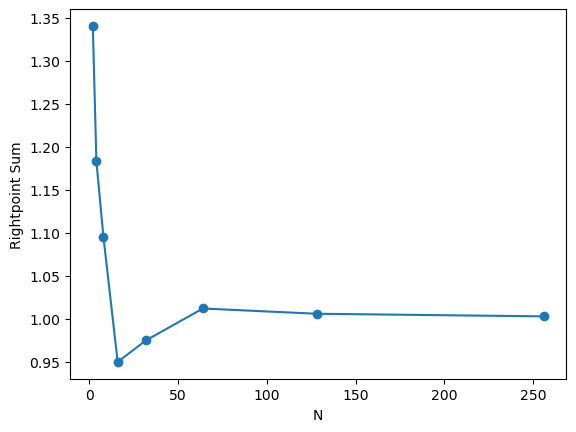

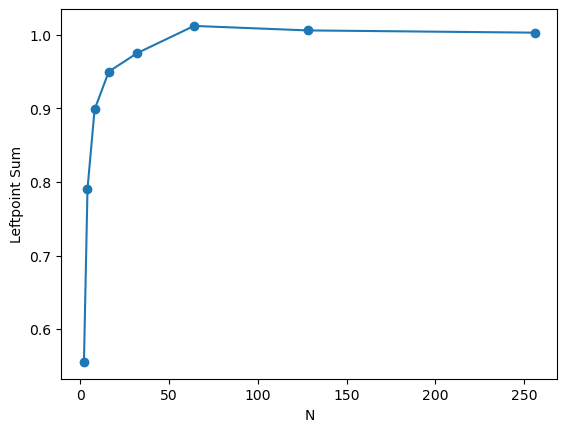

In [5]:
import pylab as py
import numpy as np

Nlist = [2,4,8,16,32,64,128,256]
anslist_L = np.zeros(len(Nlist)) # An array of zeros the same size as Nlist
anslist_R = np.zeros(len(Nlist)) # An array of zeros the same size as Nlist


# Note the use of `enumerate` here.  We'll want to store the result in a
# different array than the one we're looping over, so `enumerate`
# makes sense.
for iN, N in enumerate(Nlist):
    anslist_L[iN] = leftpoint(f,a,b,N) # Evaluate the integral using the function you defined

for iN, N in enumerate(Nlist):
    anslist_R[iN] = rightpoint(f,a,b,N) # Evaluate the integral using the function you defined

py.plot(Nlist, anslist_R,'o-')
py.xlabel('N')
py.ylabel('Rightpoint Sum')
py.show() 

py.plot(Nlist, anslist_L,'o-')
py.xlabel('N')
py.ylabel('Leftpoint Sum')
py.show()

Eventually, for large N, it looks like we approach the right answer.  It's somewhat hard to see exactly how
close we get on these scales,
so let's adjust.  Make a plot of $\log(|$calculated answer - real answer$|)$ vs $\log(N_m)$. $|x|$ indicates the absolute value of $x$, and it's implemented in `numpy` as `numpy.abs()`.

_Question:_ Which base is the logarithm computed in?  How could you change it?  (Google is your friend)

_Note:_ you can probably re-use your array of answers from above!

The error from right Riemann is proportional to N ^  -0.9709716690776636


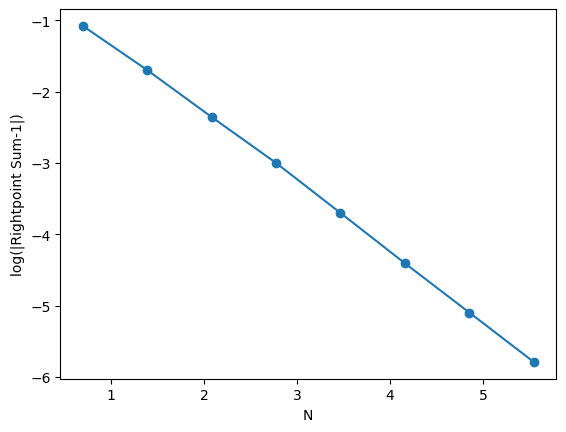

The error from left Riemann is proportional to N ^  -1.0258126367323976


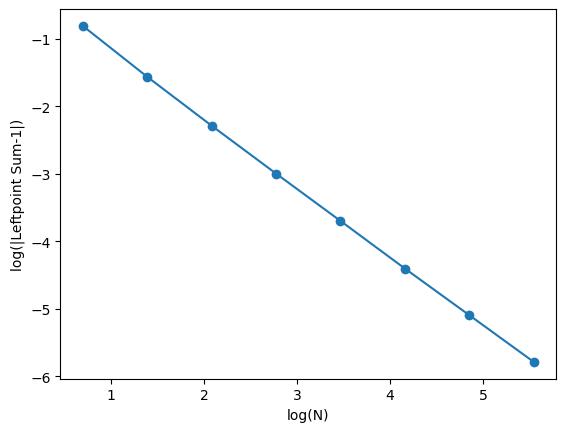

In [6]:

loggedN=np.log(Nlist)
loggedError_R=np.log(abs(anslist_R-1))
AvgSlope_R=(loggedError_R[7]-loggedError_R[0])/(loggedN[7]-loggedN[0])
print("The error from right Riemann is proportional to N ^ ", AvgSlope_R)

py.plot(np.log(Nlist), np.log(abs(anslist_R-1)),'o-')
py.xlabel('N')
py.ylabel('log(|Rightpoint Sum-1|)')
py.show() 

loggedN=np.log(Nlist)
loggedError_L=np.log(abs(anslist_L-1))
AvgSlope_L=(loggedError_L[7]-loggedError_L[0])/(loggedN[7]-loggedN[0])
print("The error from left Riemann is proportional to N ^ ", AvgSlope_L)

py.plot(np.log(Nlist), np.log(abs(anslist_L-1)),'o-')
py.xlabel('log(N)')
py.ylabel('log(|Leftpoint Sum-1|)')
py.show()

If all went well, you got a straight line.  What is the slope?

The slope is -1 for both Rightpoint and leftpointl

Intuitively, we expect the midpoint rule to give a better approximation to the area under the curve than the left or right 
endpoint rules. 

# Post-class

If you didn't make it to the end (that's fine!), the remaining exercises (above) are to be completed on your own time, so that you are ready to start Module 3.2 which picks up where this one left off. Because these two modules work together, you will benefit most from Module 3.2 if you have draft versions of HW 3.1 and 3.2 (below) done beforehand.

If you feel like you can't make it the rest of the way through on your own, please get HELP! from the instructors or your groupmates or on the Forum.

If you make it to the end of the Module before the end of class: great! You have time to start work on the homework problems for this module. 

## Homework 3.1 (JHub + $\LaTeX{}$)

a) Write a function `midpoint` which integrates a function `f` from $a$ to $b$, using $N$ intervals. This function will take the form:
* Input: f,a,b,N
* Output: the integration

For this problem, JHub nbgrader will auto-check that your `midpoint` function generates the correct output. You will need to have the exact input/output specified in this problem. Please also include a copy of your code in your $\LaTeX{}$ writeup.

b) For the definite integral of $f(x) = \sin x$ from $a$ to $b$  from $a=0$ and $b=\pi/2$, compute the error for $N = 2,4,8,16,32, 64, 128, 256$ and make a log-log plot of the absolute value of the error versus $N$. 

c) The error is proportional to some power of $N$. What is that power? 

d) **On the same plot**, show the results from the leftpoint integration  (Make sure to properly label the figure!). Hint: you can just change the name of the function call from `midpoint` to `leftpoint`, and rerun the same code! Include a copy of your `leftpoint` code in your $\LaTeX{}$ writeup.  

e) Which method is better?  And, how much better?

The error from the middle Riemann sum proportional to N ^  -2.0037350110099994
The error from the left Riemann sum is proportional to N ^  -1.0258126367323976


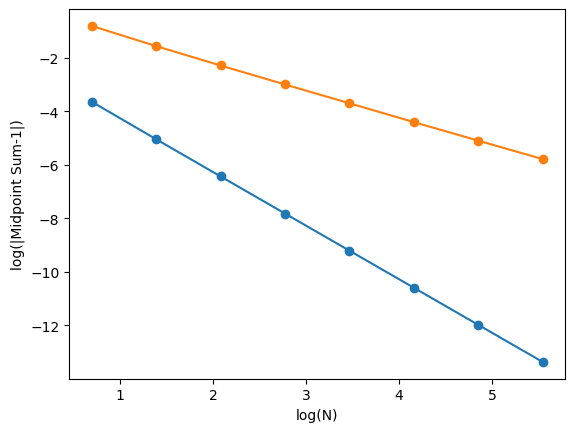

In [7]:
import matplotlib.pyplot as plt

def midpoint(f,a,b,N):
    h = (b-a)/N #calculate width of box
    x = h/2 #set starting mid point as halfway through a rectangle
    Sum = 0 #start sum as 0
    while x < b:
        Sum += f(x)*h #add area
        x += h #move left point
    return(Sum)

f,a,b = np.sin,0,np.pi/2
Nlist = [2,4,8,16,32,64,128,256]
anslist_Mid = np.zeros(len(Nlist)) # An array of zeros the same size as Nlist

for iN, N in enumerate(Nlist):
    anslist_Mid[iN] = midpoint(f,a,b,N) # Evaluate the integral using the function you defined

loggedN=np.log(Nlist)
loggedError_M=np.log(abs(anslist_Mid-1))

AvgSlope_M=(loggedError_M[7]-loggedError_M[0])/(loggedN[7]-loggedN[0])
print("The error from the middle Riemann sum proportional to N ^ ", AvgSlope_M)
print("The error from the left Riemann sum is proportional to N ^ ", AvgSlope_L)

py.plot(loggedN, loggedError_M,'o-')
py.plot(loggedN, loggedError_L,'-o')
py.xlabel('log(N)')
py.ylabel('log(|Midpoint Sum-1|)')
py.show()

Using the midpoint of the cells works better for the fuction $sin(x)$. Ideally the error for a Riemann sum decreases as the number of divisions increases. Clearly a $\dfrac{1}{N^2}$ relation decreases faster than a $\dfrac{1}{N}$ relation. Therefore the midpoint method is better than the leftpoint method by a factor of $N$.

## Homework 3.2 ($\LaTeX{}$)

a) Use the midpoint rule to evaluate the integral 
    
$$
I =  \int_0^{100} \sin(x^2)\,dx
$$

b) Make a table showing $N$ and $I$ for increasing values of $N$. We may consider a value accurate to a certain number of digits if the answer doesn't change when you increase $N$. **Hint:** Plot the function on the array you're planning on evaluating the integral on to see whether you capture what the function is doing.

c) Approximately how many subintervals are required for your answer to be 
accurate to 3 significant figures? 4 significant figures? 5 significant figures? How did you decide this?

The below code is not necessary to solving the problem but it generates four really cool plots to visualize how the value of $I$ changes as $N$ increases for different Riemann methods. It should take about $40s$ to run both blocks. The first is a plot from $N=0$ to $N=5000$. The second plot zooms in on the latter portion of the first where $I$ appears to be constant. The next two use left and right Riemann intergration rather than midpoint Riemann intergration. Note: the value of N before I becomes constant is much higher for the second two plots. This follows the conclusion from 3.1.

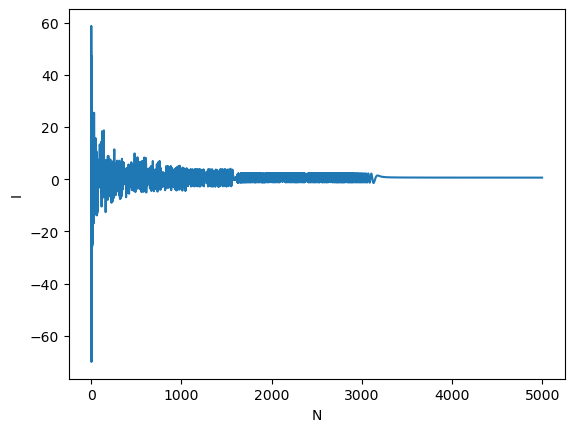

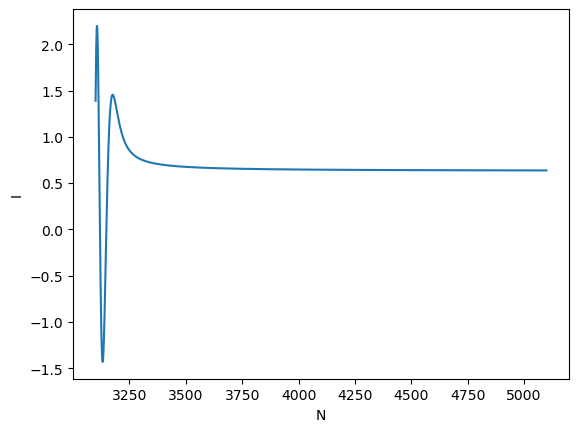

In [8]:
def sine_x_squared(x):
    return(np.sin(x**2))
    
f,a,b=sine_x_squared,0,100

Nlist1 = np.zeros(5000)
anslist_Mid = np.zeros(5000)
for i in range(5000):
    Nlist1[i]=i
    anslist_Mid[i] = midpoint(f,a,b,i+1)
py.plot(Nlist1, anslist_Mid,'-')
py.xlabel('N')
py.ylabel('I')
py.show()

Nlist2 = np.zeros(2000)
anslist_Mid2 = np.zeros(2000)
for i in range(2000):
    Nlist2[i]=i+3100
    anslist_Mid2[i] = midpoint(f,a,b,i+3100)
py.plot(Nlist2, anslist_Mid2,'-')
py.xlabel('N')
py.ylabel('I')
py.show()

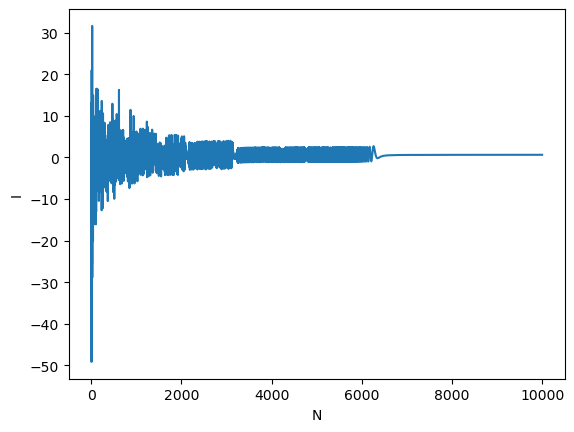

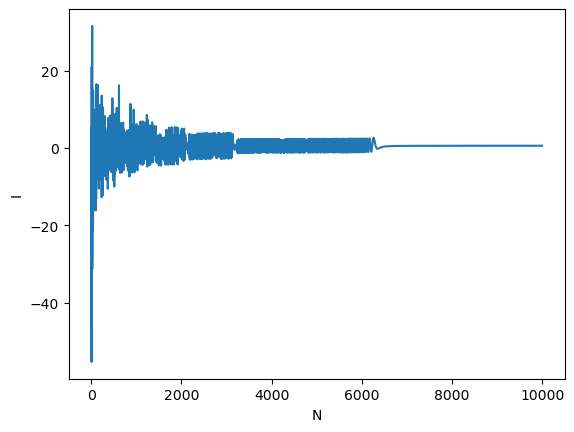

In [9]:
f,a,b=sine_x_squared,0,100

Nlist3 = np.zeros(5000)
anslist_L = np.zeros(5000)
for i in range(5000):
    Nlist3[i]=i+i
    anslist_L[i] = leftpoint(f,a,b,i+1)
py.plot(Nlist3, anslist_L,'-')
py.xlabel('N')
py.ylabel('I')
py.show()

Nlist4 = np.zeros(5000)
anslist_R = np.zeros(5000)
for i in range(5000):
    Nlist4[i]=i+i
    anslist_R[i] = rightpoint(f,a,b,i+1)
py.plot(Nlist4, anslist_R,'-')
py.xlabel('N')
py.ylabel('I')
py.show()

In [10]:
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
correct_value = 0.63141792186693373360


f,a,b=sine_x_squared,0,100

Nlist = np.zeros(100)
anslist_Mid = np.zeros(100)
for i in range(100):
    N=3300+100*i
    Nlist[i]=N
    anslist_Mid[i] = midpoint(f,a,b,N)


values = {'N': Nlist, 'Midpoint Riemann': anslist_Mid}
df = pd.DataFrame(values)

df2=df[abs(correct_value-df['Midpoint Riemann']) < 0.1]

print(df2)

          N  Midpoint Riemann
1    3400.0          0.697210
2    3500.0          0.675201
3    3600.0          0.663854
4    3700.0          0.656954
5    3800.0          0.652330
6    3900.0          0.649024
7    4000.0          0.646549
8    4100.0          0.644630
9    4200.0          0.643102
10   4300.0          0.641858
11   4400.0          0.640828
12   4500.0          0.639962
13   4600.0          0.639225
14   4700.0          0.638590
15   4800.0          0.638038
16   4900.0          0.637555
17   5000.0          0.637129
18   5100.0          0.636750
19   5200.0          0.636412
20   5300.0          0.636108
21   5400.0          0.635834
22   5500.0          0.635585
23   5600.0          0.635359
24   5700.0          0.635152
25   5800.0          0.634963
26   5900.0          0.634789
27   6000.0          0.634628
28   6100.0          0.634480
29   6200.0          0.634343
30   6300.0          0.634215
31   6400.0          0.634096
32   6500.0          0.633985
33   6600.

At around 3250. The value for the integral produced by a midpoint Riemann sum begins to converge. 

            N  Midpoint Riemann
20   126020.0          0.631423
21   126021.0          0.631423
22   126022.0          0.631423
23   126023.0          0.631423
24   126024.0          0.631423
25   126025.0          0.631423
26   126026.0          0.631423
27   126027.0          0.631423
28   126028.0          0.631423
29   126029.0          0.631423
30   126030.0          0.631423
31   126031.0          0.631423
32   126032.0          0.631423
33   126033.0          0.631423
34   126034.0          0.631423
35   126035.0          0.631423
36   126036.0          0.631423
37   126037.0          0.631423
38   126038.0          0.631423
39   126039.0          0.631423
40   126040.0          0.631423
41   126041.0          0.631423
42   126042.0          0.631423
43   126043.0          0.631423
44   126044.0          0.631423
45   126045.0          0.631423
46   126046.0          0.631423
47   126047.0          0.631423
48   126048.0          0.631423
49   126049.0          0.631423
50   126

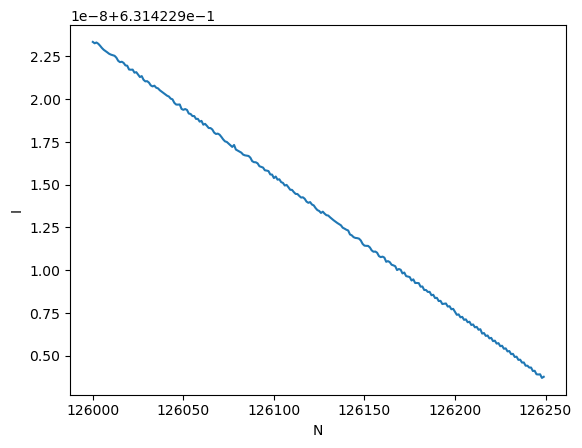

In [11]:
Nlist2 = np.zeros(250)
anslist_Mid2 = np.zeros(250)
for i in range(250):
    N=126000+i
    Nlist2[i]=N
    anslist_Mid2[i] = midpoint(f,a,b,N)

SigFig = 0.000005
values = {'N': Nlist2, 'Midpoint Riemann': anslist_Mid2}
df = pd.DataFrame(values)

df2=df[abs(correct_value-df['Midpoint Riemann']) < SigFig]

print(df2)
py.plot(Nlist2, anslist_Mid2,'-')
py.xlabel('N')
py.ylabel('I')
py.show()

By adjusting the sigfig parameter I would find where the value was acurate to a certain SigFig.

3: 13050
4: 39983
5: 126020


# Acknowledgements

This module was developed by Karen Daniels at NCSU for PY251.